In [1]:
import pandas as pd
import glob
import pickle

## Cell data

The most recent smartseq pipeline output, which combines smartseq and miseq cell data from the same GC

In [2]:
smartseq_data = "../nextflow/results/2022-07-11-smartseq-miseq"

In [3]:
node_data_file = f"{smartseq_data}/merged-results/gctree-node-data.csv"

In [4]:
node_df = pd.read_csv(node_data_file, index_col=0)
node_df

,HK_key_mouse,HK_key_node,HK_key_gc,HK_key_cell_type,name,parent_name,abundance,sampled_cell_ids,n_mutations_HC,n_mutations_LC,...,delta_bind_CGG_tdms_model_pred,delta_bind_CGG_tdms_linear_model_pred,delta_expr_FVS_additive,delta_expr_FMVS_additive,delta_expr_tdms_model_pred,delta_expr_tdms_linear_model_pred,delta_psr_FVS_additive,delta_psr_FMVS_additive,delta_psr_tdms_model_pred,delta_psr_tdms_linear_model_pred
PR,,,,,,,,,,,,,,,,,,,,,
PR1.9,4,RA,70,GC,naive,NaN,0,NaN,0,0,...,0.000000,-0.140392,0.00000,0.000000,0.000000,-0.074031,0.00000,0.000000,0.000000,0.102810
PR1.9,4,RA,70,GC,14,naive,0,NaN,1,1,...,-0.217409,0.784038,0.08245,0.001079,-0.117095,0.139110,0.00652,-0.241776,0.019231,-0.223425
PR1.9,4,RA,70,GC,1,14,0,NaN,1,3,...,-0.601847,1.125699,0.05576,-0.035121,-0.330835,0.214419,0.02368,-0.700475,0.060227,-0.550947
PR1.9,4,RA,70,GC,13,14,0,NaN,1,2,...,-0.431459,0.950650,-0.38964,-0.550631,-0.718520,-0.437369,0.08942,-0.233278,0.546404,-0.070993
PR1.9,4,RA,70,GC,seq103,1,1,220418P03G03HK,1,6,...,-1.993932,0.161912,0.03066,-0.207864,-0.852097,0.185655,0.42903,-0.751408,-0.055523,-0.557368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PR1.9,2,LP,26,GC,seq19,seq15,2,"211119P12B09HK,211119P12G12HK",2,1,...,-0.304218,1.063555,0.09578,-0.034600,-0.147928,-0.103486,0.11356,-0.411308,0.010265,-0.363803
PR1.9,2,LP,26,GC,seq57,11,1,211119P12F10HK,4,1,...,-0.845985,1.292748,-0.21792,-0.299090,-0.888928,-0.234088,0.44795,-0.285541,0.527816,-0.437517
PR1.9,2,LP,26,GC,seq66,11,1,211119P12H01HK,4,1,...,-0.813747,1.360203,0.03912,-0.113592,-0.370159,0.041902,0.26667,-0.424439,0.000767,-0.522376


### Subset to just a particular germinal center

In [5]:
mouse = 1
gc = 16

With one GC, we can set the index to the node name, since they are now unique

In [ ]:
node_df.query("HK_key_mouse == @mouse & HK_key_gc == @gc", inplace=True)
node_df.set_index("name", inplace=True)
node_df

In [ ]:
node_df.columns

## Tree data

Load the corresponding tree as a `gctree.CollapsedTree` object. See [API docs](https://matsengrp.github.io/gctree/) for details.

In [8]:
tree_files = glob.glob(f"{smartseq_data}/gctrees/*-{mouse}-*-{gc}-*/gctree.p")
assert len(tree_files) == 1
tree_file = tree_files[0]

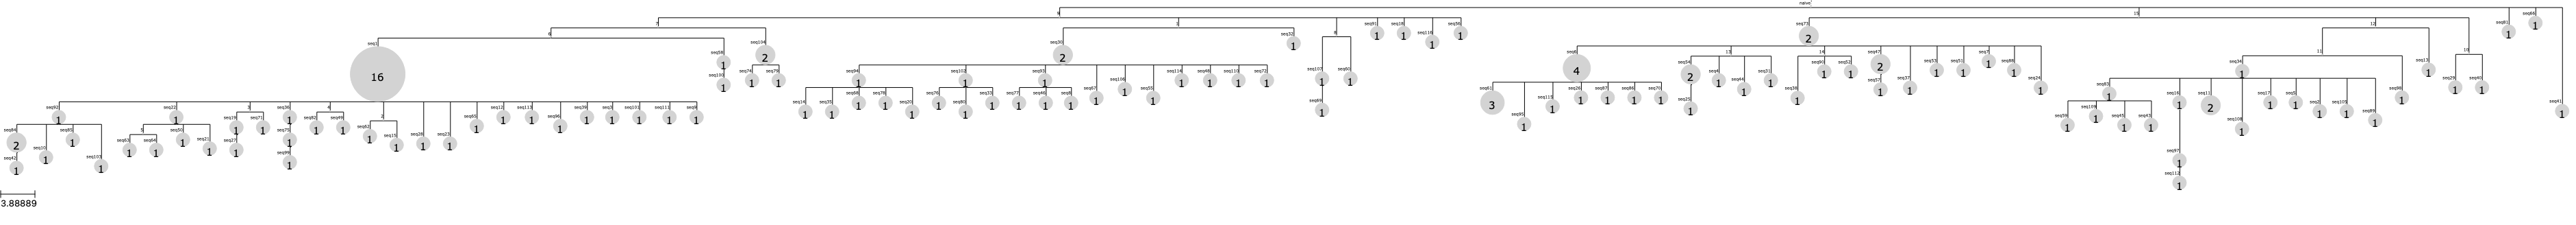

In [9]:
with open(tree_file, "rb") as f:
    tree = pickle.load(f)

tree.render("%%inline", idlabel=True)

This tree object has an [ETE tree](http://etetoolkit.org) attribute called `tree` that we can access for traversing nodes and seeing their features. See the ETE docs for details on the API. Below is a demonstration.

In [10]:
type(tree.tree)

ete3.coretype.tree.TreeNode

In [11]:
# traverse the tree, printing the name of the node, and affinity prediction
for node in tree.tree.traverse():
    print(f"node {node.name}:")
    print(f"  affinity = {node_df.delta_bind_CGG_FVS_additive[node.name]:.2f}")
    print(f"  expression = {node_df.delta_expr_FVS_additive[node.name]:.2f}")
    print(f"  cell IDs: {node_df.sampled_cell_ids[node.name]}")

node naive:
  affinity = 0.00
  expression = 0.00
  cell IDs: nan
node seq41:
  affinity = -0.44
  expression = -1.10
  cell IDs: 211014P01F05HK
node seq66:
  affinity = -0.04
  expression = 0.01
  cell IDs: 220418P01B02HK
node seq81:
  affinity = 0.05
  expression = 0.02
  cell IDs: 220418P01D06HK
node 15:
  affinity = 0.04
  expression = 0.05
  cell IDs: nan
node 9:
  affinity = 0.33
  expression = -0.01
  cell IDs: nan
node 10:
  affinity = -0.02
  expression = -0.58
  cell IDs: nan
node 12:
  affinity = 0.82
  expression = 0.09
  cell IDs: nan
node seq73:
  affinity = 0.91
  expression = 0.12
  cell IDs: 220418P01C05HK,220418P01D08HK
node seq56:
  affinity = 1.03
  expression = 0.11
  cell IDs: 211014P01H07HK
node seq116:
  affinity = 0.00
  expression = -0.34
  cell IDs: 220418P01H12HK
node seq18:
  affinity = 0.34
  expression = -0.10
  cell IDs: 211014P01C10HK
node seq91:
  affinity = 1.20
  expression = 0.06
  cell IDs: 220418P01E06HK
node 8:
  affinity = 0.42
  expression = -0